## **Exploratory Data Analysis on Health & Personal care Dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

/usr/local/lib/python3.10/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
meta_data = pd.read_csv("/kaggle/input/amazon32/amazon_metadata_health_personal_care.csv")
reviews = pd.read_csv("/kaggle/input/amazon32/amazon_reviews_health_personal_care.csv")

# Display first few rows
print("Metadata Dataset:")
display(meta_data.head())

print("\nReviews Dataset:")
display(reviews.head())


Metadata Dataset:


/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,main_category,title,average_rating,rating_number,price,store,parent_asin,date_first_available
0,Health & Personal Care,Silicone Bath Body Brush Exfoliator Shower Bac...,3.9,7,NaN,Rzoeox,B07V346GZH,"January 10, 2021"
1,Health & Personal Care,"iPhone 7 Plus 8 Plus Screen Protector, ZHXIN T...",3.8,2,NaN,ZHXIN,B075W927RH,"September 24, 2017"
2,Health & Personal Care,Zig Zag Rolling Machine 70mm Size With FREE BO...,3.9,7,NaN,NaN,B01FB26VKY,"May 27, 2016"
3,Health & Personal Care,Sting-Kill Disposable Wipes 8 Each ( Pack of 5),4.1,6,21.37,Sting-kill,B01IAI29RU,"July 11, 2016"
4,Health & Personal Care,Heated Eyelash Curler Mini Portable Electric E...,3.3,8,NaN,BiBOSS,B08CMN38RC,"July 24, 2020"



Reviews Dataset:


,rating,title,text,helpful_vote,parent_asin,verified_purchase,review_date
0,4.0,12 mg is 12 on the periodic table people! Mg f...,This review is more to clarify someone else’s ...,3,B07TDSJZMR,True,2020-02-06
1,5.0,Save the lanet using less plastic.,Love these easy multitasking bleach tablets. B...,3,B08637FWWF,True,2020-11-02
2,5.0,Fantastic,I have been suffering a couple months with hee...,0,B07KJVGNN5,True,2019-07-24
3,4.0,It holds the water and makes bubbles. That's ...,"It's cheap and it does what I wanted. The ""ma...",7,B092RP73CX,True,2022-09-04
4,1.0,Not for me,Didn't do a thing for me. Not saying they don'...,0,B08KYJLF5T,True,2022-01-20


In [3]:
# Convert review_date with error handling
reviews["review_date"] = pd.to_datetime(reviews["review_date"], errors='coerce', infer_datetime_format=True)

# Convert date_first_available with error handling
meta_data["date_first_available"] = pd.to_datetime(meta_data["date_first_available"], errors='coerce', infer_datetime_format=True)

# Identify rows with conversion issues
print("Invalid dates in reviews:", reviews["review_date"].isna().sum())
print("Invalid dates in meta_data:", meta_data["date_first_available"].isna().sum())

# Optionally drop rows with NaT values after conversion
reviews.dropna(subset=["review_date"], inplace=True)
meta_data.dropna(subset=["date_first_available"], inplace=True)

# Merge datasets
merged_df = reviews.merge(meta_data, on="parent_asin", how="left")

print("Merged Data Preview:")
display(merged_df.head())


<ipython-input-3-6419238e334a>:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  reviews["review_date"] = pd.to_datetime(reviews["review_date"], errors='coerce', infer_datetime_format=True)
<ipython-input-3-6419238e334a>:5: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  meta_data["date_first_available"] = pd.to_datetime(meta_data["date_first_available"], errors='coerce', infer_datetime_format=True)


Invalid dates in reviews: 0
Invalid dates in meta_data: 2306
Merged Data Preview:


/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,rating,title_x,text,helpful_vote,parent_asin,verified_purchase,review_date,main_category,title_y,average_rating,rating_number,price,store,date_first_available
0,4.0,12 mg is 12 on the periodic table people! Mg f...,This review is more to clarify someone else’s ...,3,B07TDSJZMR,True,2020-02-06,Health & Personal Care,High Potency Magnesium Citrate Capsules 1000mg...,4.5,470.0,NaN,Life Nutrition,2019-08-11
1,5.0,Save the lanet using less plastic.,Love these easy multitasking bleach tablets. B...,3,B08637FWWF,True,2020-11-02,Health & Personal Care,Evolve Concentrated Bleach Tablets - 32-ct Bot...,4.8,181.0,NaN,Evolve,2019-09-12
2,5.0,Fantastic,I have been suffering a couple months with hee...,0,B07KJVGNN5,True,2019-07-24,Health & Personal Care,"Dr. Foot's Gel Heel Protectors, Plantar Fascii...",3.6,78.0,NaN,Dr.Foot,2018-11-15
3,4.0,It holds the water and makes bubbles. That's ...,"It's cheap and it does what I wanted. The ""ma...",7,B092RP73CX,True,2022-09-04,Health & Personal Care,"Homedics Bubble Bliss Deluxe-Foot Spa, Heat Ma...",4.4,8312.0,NaN,Homedics,2019-09-17
4,1.0,Not for me,Didn't do a thing for me. Not saying they don'...,0,B08KYJLF5T,True,2022-01-20,Health & Personal Care,Brain Supplement 1053mg - Premium Nootropic Br...,4.1,94.0,NaN,Nature's Nutrition,2020-12-08


## **Statistical Analysis**

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd
import numpy as np

# Load the trained LSTM model
model = tf.keras.models.load_model("/kaggle/input/lstm/tensorflow2/default/1/sentiment_lstm.h5")

# Load the datasets
meta_data = pd.read_csv("/kaggle/input/amazon32/amazon_metadata_health_personal_care.csv")
reviews = pd.read_csv("/kaggle/input/amazon32/amazon_reviews_health_personal_care.csv")

# Merge datasets
merged_df = reviews.merge(meta_data, on="parent_asin", how="left")

# Check the first few rows
print(merged_df.head())


   rating                                            title_x  \
0     4.0  12 mg is 12 on the periodic table people! Mg f...   
1     5.0                 Save the lanet using less plastic.   
2     5.0                                          Fantastic   
3     4.0  It holds the water and makes bubbles.  That's ...   
4     1.0                                         Not for me   

                                                text  helpful_vote  \
0  This review is more to clarify someone else’s ...             3   
1  Love these easy multitasking bleach tablets. B...             3   
2  I have been suffering a couple months with hee...             0   
3  It's cheap and it does what I wanted.  The "ma...             7   
4  Didn't do a thing for me. Not saying they don'...             0   

  parent_asin  verified_purchase review_date           main_category  \
0  B07TDSJZMR               True  2020-02-06  Health & Personal Care   
1  B08637FWWF               True  2020-11-02  Heal

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [5]:
# Summary of numerical columns
print("\nSummary Statistics of Numerical Columns:")
print(merged_df.describe())

# Unique categories in 'main_category'
print("\nUnique Categories:")
print(merged_df["main_category"].unique())

# Count of verified purchases
print("\nVerified vs Non-Verified Purchase Counts:")
print(merged_df["verified_purchase"].value_counts())



Summary Statistics of Numerical Columns:
              rating   helpful_vote  average_rating  rating_number  \
count  494121.000000  494121.000000   494121.000000  494121.000000   
mean        3.996523       1.131802        4.072002    1027.734073   
std         1.478626      15.437500        0.570980    3194.665289   
min         1.000000       0.000000        1.000000       1.000000   
25%         3.000000       0.000000        3.700000      32.000000   
50%         5.000000       0.000000        4.200000     139.000000   
75%         5.000000       1.000000        4.500000     621.000000   
max         5.000000    7326.000000        5.000000   60033.000000   

               price  
count  169019.000000  
mean       30.855426  
std        74.645572  
min         0.100000  
25%        12.500000  
50%        19.990000  
75%        33.990000  
max      4449.000000  

Unique Categories:
['Health & Personal Care']

Verified vs Non-Verified Purchase Counts:
verified_purchase
True     445

## **Distribution of Ratings**

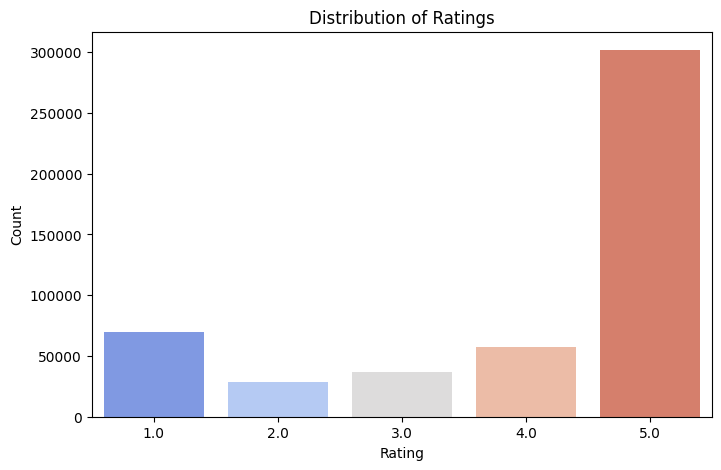

In [6]:
plt.figure(figsize=(8,5))
sns.countplot(x="rating", data=merged_df, palette="coolwarm")
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


## **Top 10 Most Reviewed Products**

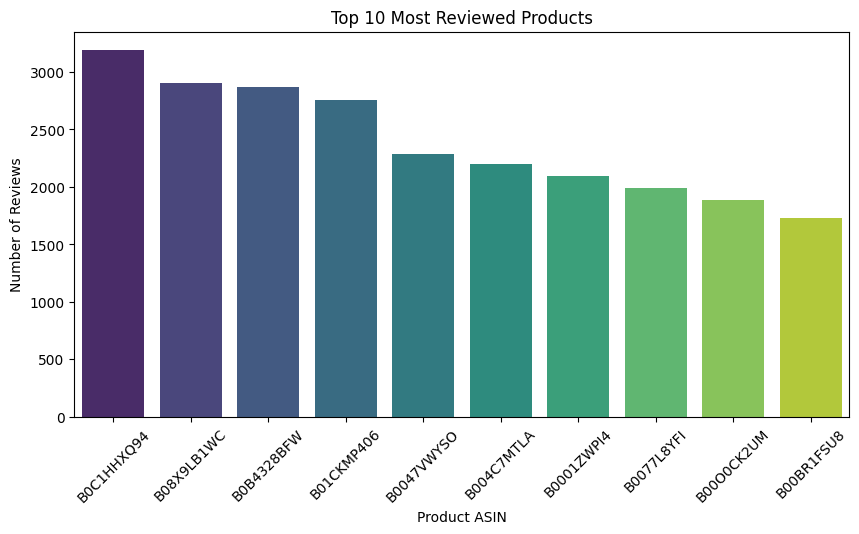

In [7]:
top_products = merged_df["parent_asin"].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_products.index, y=top_products.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("Top 10 Most Reviewed Products")
plt.xlabel("Product ASIN")
plt.ylabel("Number of Reviews")
plt.show()


## **Review Trends over Time**

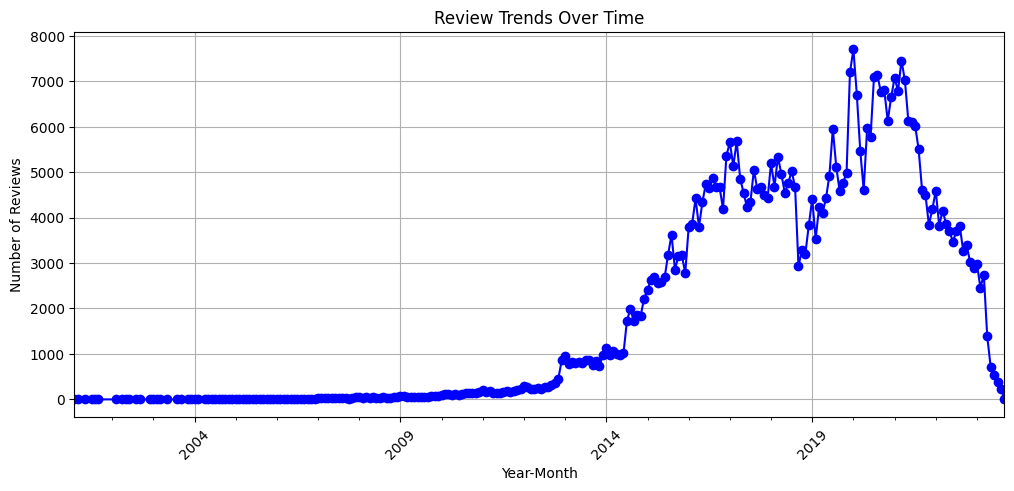

In [8]:
merged_df["review_date"] = pd.to_datetime(merged_df["review_date"])
merged_df["year_month"] = merged_df["review_date"].dt.to_period("M")

plt.figure(figsize=(12,5))
merged_df["year_month"].value_counts().sort_index().plot(kind="line", marker="o", color="b")
plt.title("Review Trends Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45)
plt.grid()
plt.show()


## **Frequent Words**

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


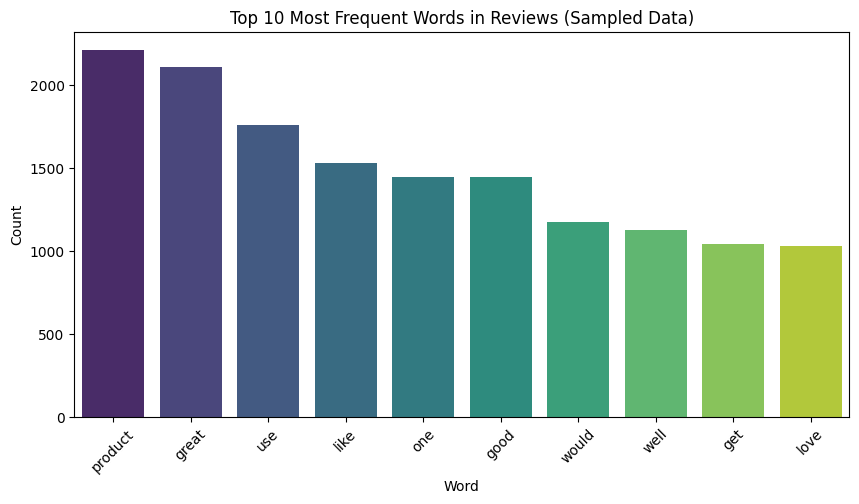

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
from collections import Counter
import nltk
from nltk.corpus import stopwords

# Ensure stopwords are downloaded
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

# Load spaCy model for faster tokenization
nlp = spacy.load("en_core_web_sm")

# Function for optimized text processing
def preprocess_text_spacy(text):
    text = str(text).lower()
    doc = nlp(text)
    words = [token.text for token in doc if token.text.isalpha() and token.text not in stop_words]
    return words

# Sample 10,000 reviews for efficiency
sample_reviews = merged_df["text"].dropna().sample(n=10000, random_state=42)

# Apply faster processing
all_words = sample_reviews.apply(preprocess_text_spacy).sum()

# Get top 10 words
word_counts = Counter(all_words)
top_words = word_counts.most_common(10)

# Convert to DataFrame for plotting
top_words_df = pd.DataFrame(top_words, columns=["Word", "Count"])

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x="Word", y="Count", data=top_words_df, palette="viridis")
plt.title("Top 10 Most Frequent Words in Reviews (Sampled Data)")
plt.xlabel("Word")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


## **Word Cloud**

/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)


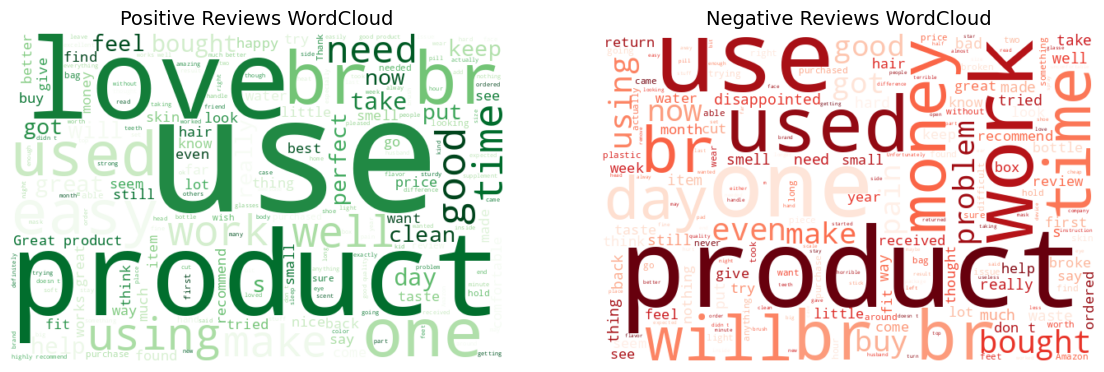

In [10]:
# Apply Sentiment Analysis
sia = SentimentIntensityAnalyzer()
merged_df["sentiment_score"] = merged_df["text"].dropna().apply(lambda x: sia.polarity_scores(x)["compound"])

# Separate positive and negative reviews
positive_reviews = " ".join(merged_df[merged_df["sentiment_score"] > 0]["text"].dropna())
negative_reviews = " ".join(merged_df[merged_df["sentiment_score"] < 0]["text"].dropna())

# Generate WordClouds
fig, ax = plt.subplots(1, 2, figsize=(14,6))

wordcloud_pos = WordCloud(width=600, height=400, background_color="white", colormap="Greens").generate(positive_reviews)
ax[0].imshow(wordcloud_pos, interpolation="bilinear")
ax[0].set_title("Positive Reviews WordCloud", fontsize=14)
ax[0].axis("off")

wordcloud_neg = WordCloud(width=600, height=400, background_color="white", colormap="Reds").generate(negative_reviews)
ax[1].imshow(wordcloud_neg, interpolation="bilinear")
ax[1].set_title("Negative Reviews WordCloud", fontsize=14)
ax[1].axis("off")

plt.show()


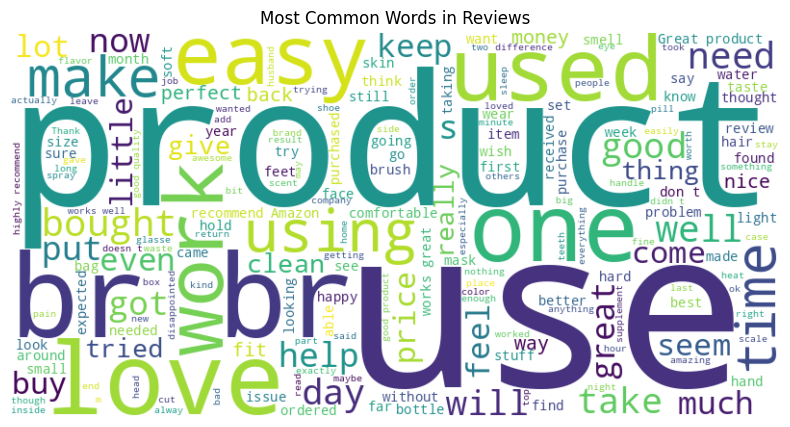

In [11]:
all_reviews = " ".join(merged_df["text"].dropna())

wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_reviews)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Reviews")
plt.show()


## **Distribution of Review Lengths**

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


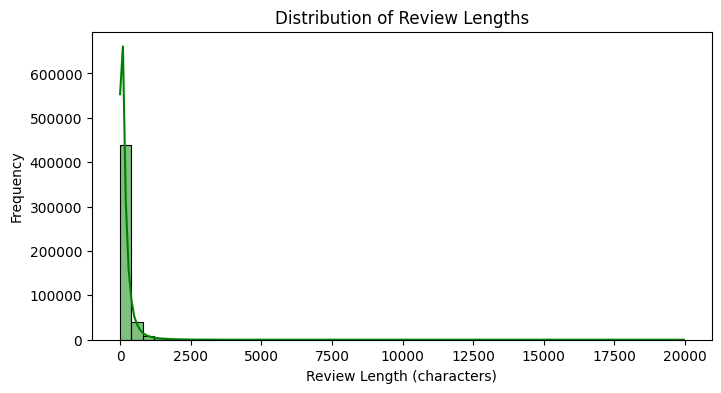

In [12]:
merged_df["review_length"] = merged_df["text"].astype(str).apply(len)

plt.figure(figsize=(8, 4))
sns.histplot(merged_df["review_length"], bins=50, kde=True, color="green")
plt.title("Distribution of Review Lengths")
plt.xlabel("Review Length (characters)")
plt.ylabel("Frequency")
plt.show()


## **Sentiment Distribution**

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
Sentiment Distribution:
sentiment_label
Positive    361488
Negative    132633
Name: count, dtype: int64


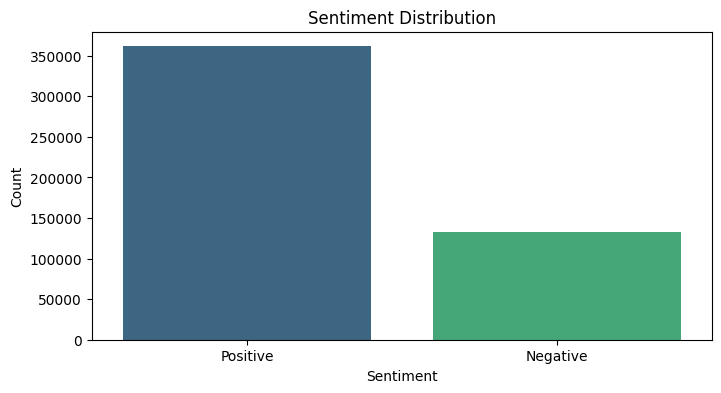

In [13]:
nltk.download("vader_lexicon")
sia = SentimentIntensityAnalyzer()

# Compute sentiment scores
merged_df["sentiment_score"] = merged_df["text"].astype(str).apply(lambda x: sia.polarity_scores(x)["compound"])
merged_df["sentiment_label"] = merged_df["sentiment_score"].apply(lambda x: "Positive" if x > 0 else "Negative")

print("Sentiment Distribution:")
print(merged_df["sentiment_label"].value_counts())

# Visualization
plt.figure(figsize=(8, 4))
sns.countplot(x=merged_df["sentiment_label"], palette="viridis")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
Sentiment Distribution:
sentiment_label
Positive    359210
Negative     77100
Neutral      57811
Name: count, dtype: int64


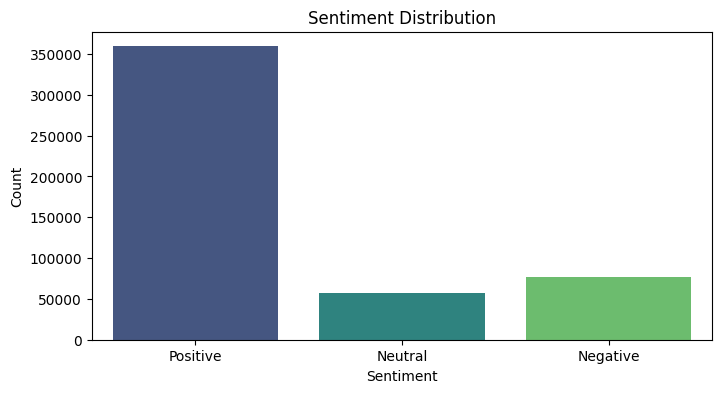

In [14]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

# Download and initialize VADER
nltk.download("vader_lexicon")
sia = SentimentIntensityAnalyzer()

# Compute sentiment scores
merged_df["sentiment_score"] = merged_df["text"].astype(str).apply(lambda x: sia.polarity_scores(x)["compound"])

# Classify sentiment
def classify_sentiment(score):
    if score > 0.05:
        return "Positive"
    elif score < -0.05:
        return "Negative"
    else:
        return "Neutral"

merged_df["sentiment_label"] = merged_df["sentiment_score"].apply(classify_sentiment)

# Display sentiment distribution
print("Sentiment Distribution:")
print(merged_df["sentiment_label"].value_counts())

# Visualization
plt.figure(figsize=(8, 4))
sns.countplot(x=merged_df["sentiment_label"], palette="viridis", order=["Positive", "Neutral", "Negative"])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
from wordcloud import WordCloud
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences



# Load LSTM model
model = load_model("/kaggle/input/lstm/tensorflow2/default/1/sentiment_lstm.h5")

# Tokenizer setup
MAX_WORDS = 10000
MAX_SEQUENCE_LENGTH = 100

tokenizer = Tokenizer(num_words=MAX_WORDS, lower=True, oov_token="<OOV>")
tokenizer.fit_on_texts(merged_df["text"].astype(str))

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(merged_df["text"].astype(str))
padded_sequences = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

# Predict sentiment scores
predictions = model.predict(padded_sequences)

# Add LSTM predictions to DataFrame
merged_df["lstm_sentiment_score"] = predictions
merged_df["lstm_sentiment_label"] = merged_df["lstm_sentiment_score"].apply(lambda x: "Positive" if x > 0.5 else "Negative")

# Display results
print("LSTM Sentiment Distribution:")
print(merged_df["lstm_sentiment_label"].value_counts())


15442/15442 ━━━━━━━━━━━━━━━━━━━━ 57s 4ms/step
LSTM Sentiment Distribution:
lstm_sentiment_label
Positive    414109
Negative     80012
Name: count, dtype: int64


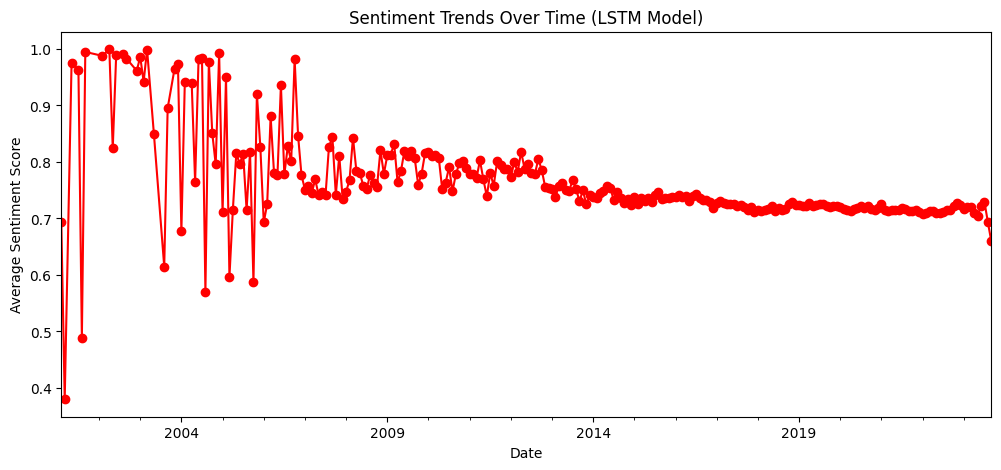

In [16]:
# Aggregate LSTM Sentiment Over Time
monthly_sentiment = merged_df.groupby(merged_df["review_date"].dt.to_period("M"))["lstm_sentiment_score"].mean()

plt.figure(figsize=(12, 5))
monthly_sentiment.plot(marker="o", color="red")
plt.title("Sentiment Trends Over Time (LSTM Model)")
plt.xlabel("Date")
plt.ylabel("Average Sentiment Score")
plt.show()

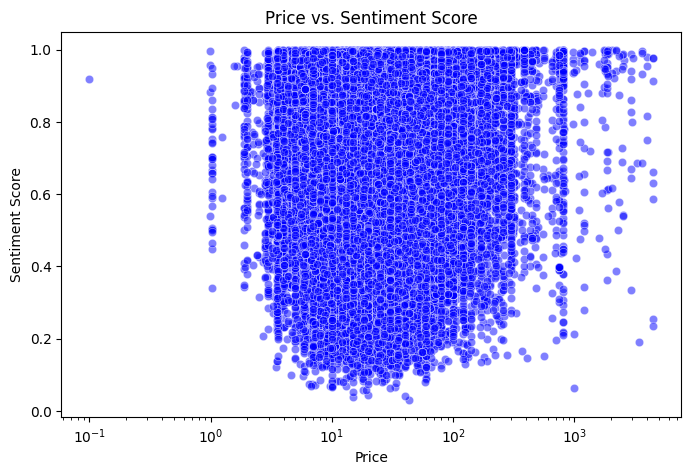

In [17]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=merged_df["price"], y=merged_df["lstm_sentiment_score"], alpha=0.5, color="blue")
plt.title("Price vs. Sentiment Score")
plt.xlabel("Price")
plt.ylabel("Sentiment Score")
plt.xscale("log")
plt.show()


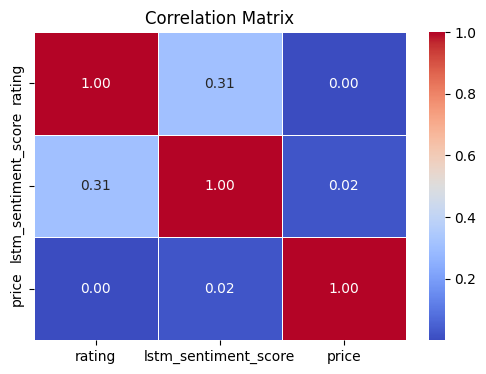

In [18]:
# Compute correlation matrix
correlation_matrix = merged_df[["rating", "lstm_sentiment_score", "price"]].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
15442/15442 ━━━━━━━━━━━━━━━━━━━━ 84s 5ms/step


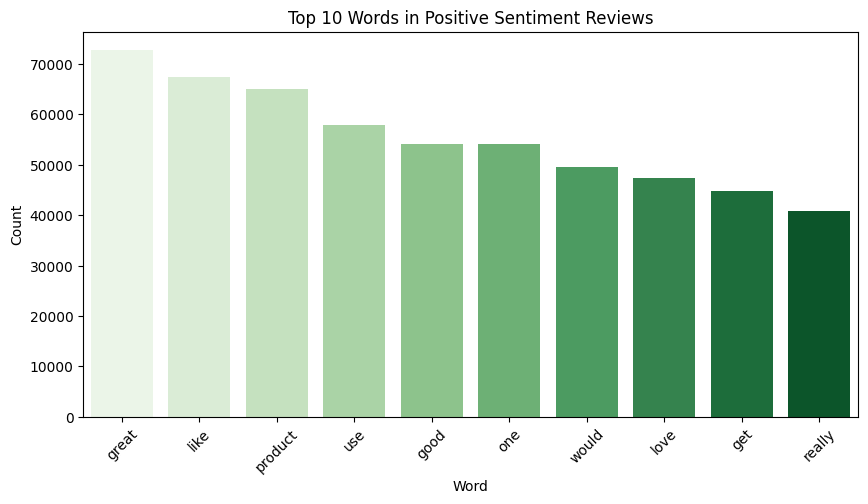

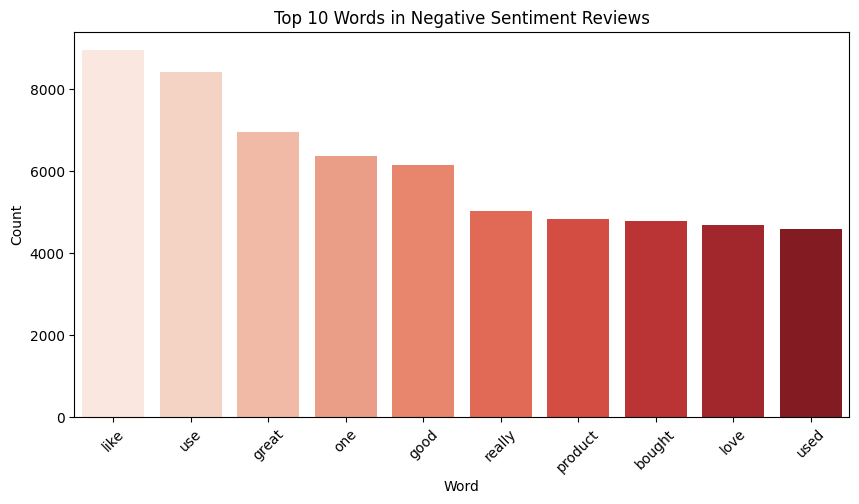

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from collections import Counter
from nltk.corpus import stopwords

# Load stopwords
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

# Load LSTM model
model = tf.keras.models.load_model("/kaggle/input/lstm/tensorflow2/default/1/sentiment_lstm.h5")

# Tokenizer (Ensure same preprocessing as used during training)
max_words = 5000  # Adjust based on training
max_len = 200  # Adjust based on training
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(merged_df["text"].dropna())  # Fit on all available text

# Function to preprocess text
def preprocess_text_lstm(text):
    if not isinstance(text, str):  # Ensure text is a string
        return ""  
    text = text.lower()  # Convert to lowercase
    words = [word for word in text.split() if word.isalpha() and word not in stop_words]  # Remove stopwords
    return " ".join(words)

# Apply preprocessing safely
merged_df["clean_text"] = merged_df["text"].apply(preprocess_text_lstm)

# Tokenize and pad sequences
sequences = tokenizer.texts_to_sequences(merged_df["clean_text"])
padded_sequences = pad_sequences(sequences, maxlen=max_len)

# Predict sentiments using LSTM model
predictions = model.predict(padded_sequences)
merged_df["sentiment"] = np.where(predictions > 0.5, "positive", "negative")  # Assuming binary classification

# Function to get top words per sentiment
def get_top_words(sentiment_class):
    sentiment_texts = merged_df[merged_df["sentiment"] == sentiment_class]["clean_text"].dropna().str.split().sum()
    word_counts = Counter(sentiment_texts)
    return word_counts.most_common(10)

# Get top words for each sentiment
top_words_positive = get_top_words("positive")
top_words_negative = get_top_words("negative")

# Function to plot top words
def plot_top_words(top_words, sentiment, color):
    df = pd.DataFrame(top_words, columns=["Word", "Count"])
    plt.figure(figsize=(10, 5))
    sns.barplot(x="Word", y="Count", data=df, palette=color)
    plt.title(f"Top 10 Words in {sentiment.capitalize()} Sentiment Reviews")
    plt.xlabel("Word")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

# Plot top words for both sentiments
plot_top_words(top_words_positive, "positive", "Greens")
plot_top_words(top_words_negative, "negative", "Reds")
